<a href="https://colab.research.google.com/github/Andoniadou-Lab/epitome_tools/blob/main/cell_typing_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# In this Colab Jupyter Notebook we demonstrate the epitome_tools cell typing workflow on two datasets (GSE239390, GSE120410) mentioned by reviewer 1 for our pending publication Kover et al. (2025).





### While these two datasets were included in the model training, the analysis here provides a careful control, namely that we repeat cell type annotation following different pre-processing. In GSE239390 the authors used Cell Ranger, while in GSE120410 a modified pituitary-specific reference genome was used. As such, when using these feature names, not all genes are present that our model "looks for". Despite this, we demonstrate accurate cell typing, showing robustness of our model.





### The notebook workflow consists of the following steps:

#### 1. We first download data from the respective GEO accessions: GSE239390, GSE120410

#### 2. We perform the required normalisation (which is standard in scRNA-seq), specifically: total count normalisation (to 10K) followed by log1p transformation.

#### 3. We show the one-line cell typing and doublet detection workflow with the epitome_tools model.

#### 4. We generate UMAPs of assigned cell types and dotplots of canonical markers to illustrate cell typing fidelity.



# Installing dependencies

In [1]:
!pip install scanpy
!pip install epitome_tools

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 46.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.6/176.6 kB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.6/58.6 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 284.1/284.1 kB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.2/9.2 MB 74.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.2/69.2 MB 25.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for epitome_tools: filename=epitome_tools-1.0.4-py3-none-any.whl size=69857499 sha256=092f32c633b58781805a092d341afff923dc3b1ab2c838783ebca00b0955f6bc
  Stored in directory: /root/.cache/pip/wheels/42/2a/6f/b6754fe1f7b14c968fc6723594e7e274ddfc07d00d1ecc7298
Successfully built epitome_tools


# Downloading GSE239390

In [2]:
!wget --content-disposition "https://www.ncbi.nlm.nih.gov/geo/download/?acc=GSE239390&format=file"

--2026-02-16 15:36:12--  https://www.ncbi.nlm.nih.gov/geo/download/?acc=GSE239390&format=file
Resolving www.ncbi.nlm.nih.gov (www.ncbi.nlm.nih.gov)... 130.14.29.110, 2607:f220:41e:4290::110
Connecting to www.ncbi.nlm.nih.gov (www.ncbi.nlm.nih.gov)|130.14.29.110|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 183777280 (175M) [application/x-tar]
Saving to: ‘GSE239390_RAW.tar’

GSE239390_RAW.tar   100%[===================>] 175.26M  72.8MB/s    in 2.4s    

2026-02-16 15:36:14 (72.8 MB/s) - ‘GSE239390_RAW.tar’ saved [183777280/183777280]



In [3]:
#un tar /content/GSE239390_RAW.tar
!tar -xf /content/GSE239390_RAW.tar

In [4]:
#gunzip, untar /content/GSM7664010_igacre_matrix.tar.gz
!gunzip /content/GSM7664010_igacre_matrix.tar.gz
!tar -xf /content/GSM7664010_igacre_matrix.tar

!gunzip /content/GSM7664008_Young_matrix.tar.gz
!tar -xf /content/GSM7664008_Young_matrix.tar

!gunzip /content/GSM7664009_Old_matrix.tar.gz
!tar -xf /content/GSM7664009_Old_matrix.tar

# Annotating GSE239390

In [5]:
from epitome_tools.workflow import celltype_doublet_workflow, check_sample_compatibility_normalization
import scanpy as sc

/usr/lib/python3.12/functools.py:912: UserWarning: zero-centering a sparse array/matrix densifies it.
  return dispatch(args[0].__class__)(*args, **kw)


Percentage of features present in adata: 96.14%
At least 70% of the features are present in the adata object.
The dataset has passed the compatibility check.
Combined matrix shape for model 1: (1339, 32288)
Found 1424 available features out of 1478 required for model 1.
Filled final matrix for model 1 from sparse data.
Percentage of features present in adata: 96.80%
At least 70% of the features are present in the adata object.
The dataset has passed the compatibility check.
Adding 'pct_counts_kept' to assay data.
[0.53462386 0.22741054 0.15128101 0.5300323  0.37350997]
Combined matrix shape for model 2: (1339, 32289)
Found 1454 available features out of 1498 required for model 2.
Filled final matrix for model 2 from sparse data.
Doublet prediction with model complete.


/usr/lib/python3.12/functools.py:912: UserWarning: zero-centering a sparse array/matrix densifies it.
  return dispatch(args[0].__class__)(*args, **kw)


Percentage of features present in adata: 93.50%
At least 70% of the features are present in the adata object.
The dataset has passed the compatibility check.
Combined matrix shape for model 1: (9000, 31056)
Found 1385 available features out of 1478 required for model 1.
Filled final matrix for model 1 from sparse data.
Percentage of features present in adata: 94.99%
At least 70% of the features are present in the adata object.
The dataset has passed the compatibility check.
Adding 'pct_counts_kept' to assay data.
[0.3171953  0.28590974 0.13615346 0.29660195 0.25990072]
Combined matrix shape for model 2: (9000, 31057)
Found 1427 available features out of 1498 required for model 2.
Filled final matrix for model 2 from sparse data.
Doublet prediction with model complete.


/usr/lib/python3.12/functools.py:912: UserWarning: zero-centering a sparse array/matrix densifies it.
  return dispatch(args[0].__class__)(*args, **kw)


Percentage of features present in adata: 93.50%
At least 70% of the features are present in the adata object.
The dataset has passed the compatibility check.
Combined matrix shape for model 1: (12465, 31056)
Found 1385 available features out of 1478 required for model 1.
Filled final matrix for model 1 from sparse data.
Percentage of features present in adata: 94.99%
At least 70% of the features are present in the adata object.
The dataset has passed the compatibility check.
Adding 'pct_counts_kept' to assay data.
[0.36430433 0.3771301  0.3266012  0.33170736 0.29009753]
Combined matrix shape for model 2: (12465, 31057)
Found 1427 available features out of 1498 required for model 2.
Filled final matrix for model 2 from sparse data.
Doublet prediction with model complete.


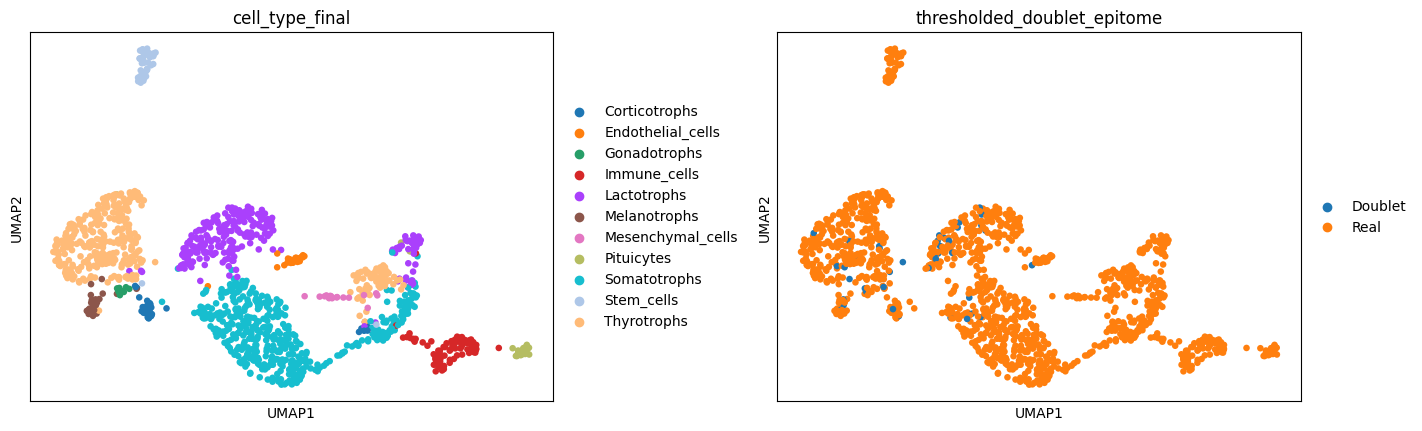

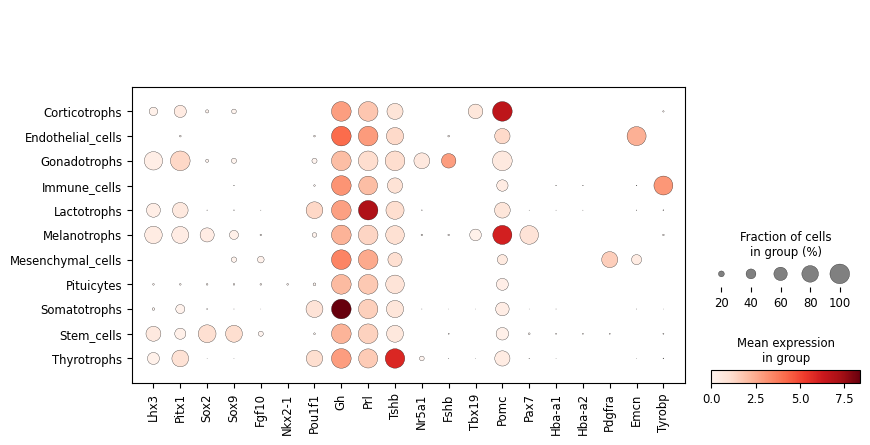

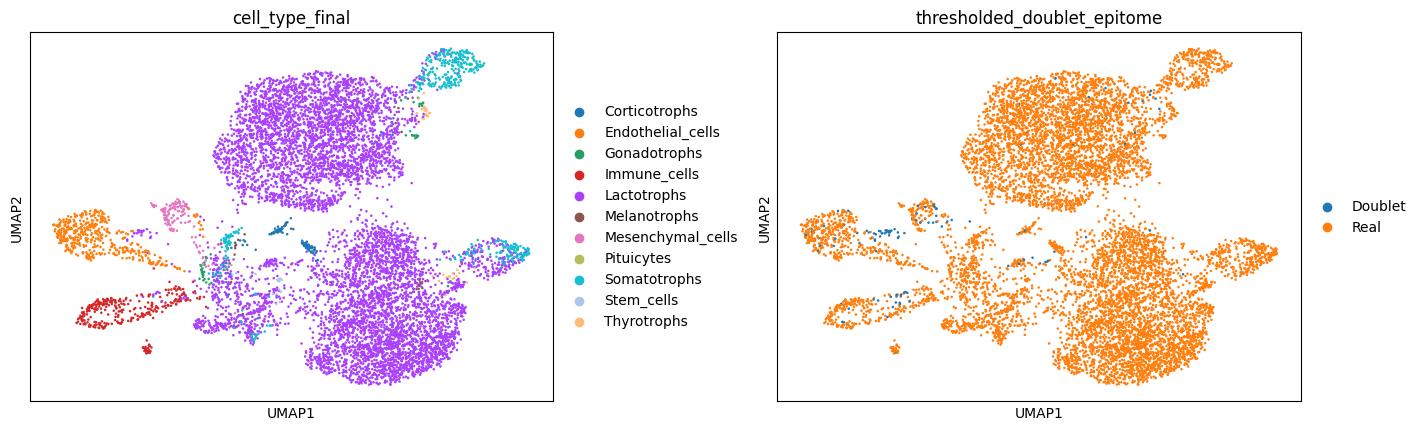

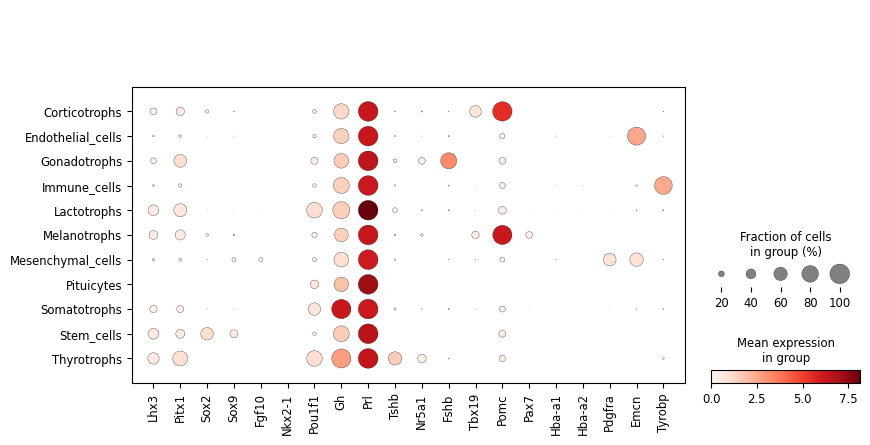

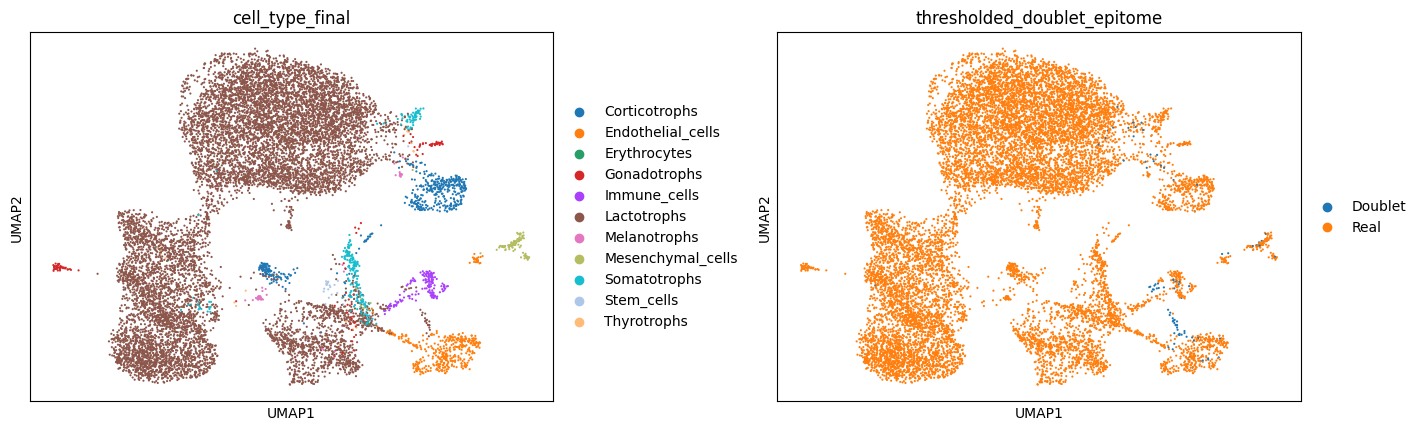

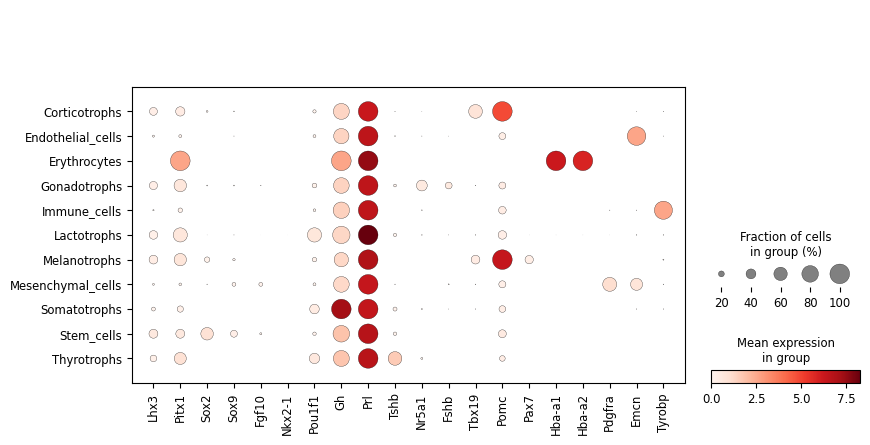

In [6]:
samples = ["igacre","PO12D","PY12C"]
for sample in samples:
  adata = sc.read_10x_mtx(f"/content/{sample}")
  sc.pp.normalize_total(adata, target_sum=1e4)
  sc.pp.log1p(adata)

  adata.layers["log1p"] = adata.X.copy()

  #scale
  sc.pp.scale(adata, max_value=10)

  #pca, neighbors, umap
  sc.tl.pca(adata, svd_solver='arpack')
  sc.pp.neighbors(adata, n_neighbors=25, n_pcs=42)
  sc.tl.umap(adata)

  adata.X = adata.layers["log1p"].copy()

  #cell typing
  adata = celltype_doublet_workflow(
                                adata,
                                active_assay="sc",
                                modality="rna",
                                nan_or_zero="zero")

  #plotting
  #thresholded_doublet_epitome True rename to Doublet and False to Real
  adata.obs["thresholded_doublet_epitome"] = adata.obs["thresholded_doublet_epitome"].replace({True: "Doublet", False: "Real"})
  #plotting
  umap = sc.pl.umap(adata, color=['cell_type_final','thresholded_doublet_epitome'],wspace=0.3, return_fig=True)
  #save as png and svg
  umap.savefig(f"/content/{sample}/umap.png", dpi=300)
  #dotplot of Sox2, Sox9, Pou1f1, Nr5a1, Tbx19, Pax7
  genes = ["Lhx3","Pitx1","Sox2","Sox9","Fgf10","Nkx2-1","Pou1f1","Gh","Prl","Tshb","Nr5a1","Fshb","Tbx19","Pomc","Pax7","Hba-a1","Hba-a2","Pdgfra","Emcn","Tyrobp"]
  dotplot = sc.pl.dotplot(adata, genes, groupby="cell_type_final", return_fig=True)
  dotplot.savefig(f"/content/{sample}/dotplot.png", dpi=300)

# Downloading GSE120410

In [7]:
#dl https://www.ncbi.nlm.nih.gov/geo/download/?acc=GSE120410&format=file&file=GSE120410%5Fbarcodes%2Etsv%2Egz
#dl https://www.ncbi.nlm.nih.gov/geo/download/?acc=GSE120410&format=file&file=GSE120410%5Fgenes%2Etsv%2Egz
#dl https://www.ncbi.nlm.nih.gov/geo/download/?acc=GSE120410&format=file&file=GSE120410%5Fmatrix%2Emtx%2Egz

!wget --content-disposition "https://www.ncbi.nlm.nih.gov/geo/download/?acc=GSE120410&format=file&file=GSE120410%5Fbarcodes%2Etsv%2Egz"
!wget --content-disposition "https://www.ncbi.nlm.nih.gov/geo/download/?acc=GSE120410&format=file&file=GSE120410%5Fgenes%2Etsv%2Egz"
!wget --content-disposition "https://www.ncbi.nlm.nih.gov/geo/download/?acc=GSE120410&format=file&file=GSE120410%5Fmatrix%2Emtx%2Egz"
#make a new dir for these files called GSE120410

!mkdir /content/GSE120410
#copy there /content/GSE120410_barcodes.tsv.gz, /content/GSE120410_genes.tsv.gz and /content/GSE120410_matrix.mtx.gz
!mv /content/GSE120410_barcodes.tsv.gz /content/GSE120410/barcodes.tsv.gz
!mv /content/GSE120410_matrix.mtx.gz /content/GSE120410/matrix.mtx.gz
!mv /content/GSE120410_genes.tsv.gz /content/GSE120410/features.tsv.gz

--2026-02-16 15:46:32--  https://www.ncbi.nlm.nih.gov/geo/download/?acc=GSE120410&format=file&file=GSE120410%5Fbarcodes%2Etsv%2Egz
Resolving www.ncbi.nlm.nih.gov (www.ncbi.nlm.nih.gov)... 130.14.29.110, 2607:f220:41e:4290::110
Connecting to www.ncbi.nlm.nih.gov (www.ncbi.nlm.nih.gov)|130.14.29.110|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 55080 (54K) [application/octet-stream]
Saving to: ‘GSE120410_barcodes.tsv.gz’

GSE120410_barcodes. 100%[===================>]  53.79K   133KB/s    in 0.4s    

2026-02-16 15:46:34 (133 KB/s) - ‘GSE120410_barcodes.tsv.gz’ saved [55080/55080]

--2026-02-16 15:46:34--  https://www.ncbi.nlm.nih.gov/geo/download/?acc=GSE120410&format=file&file=GSE120410%5Fgenes%2Etsv%2Egz
Resolving www.ncbi.nlm.nih.gov (www.ncbi.nlm.nih.gov)... 130.14.29.110, 2607:f220:41e:4290::110
Connecting to www.ncbi.nlm.nih.gov (www.ncbi.nlm.nih.gov)|130.14.29.110|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 222709 (217K) [

# Annotating GSE120410

In [8]:
#reading /content/GSE120410/features.tsv.gz
import pandas as pd
data = pd.read_csv("/content/GSE120410/features.tsv.gz", sep="\t", header=None)
#add 3nd col saying "Gene Expression"
data[2] = "Gene Expression"
#save back
data.to_csv("/content/GSE120410/features.tsv.gz", sep="\t", header=None, index=False)


/usr/lib/python3.12/functools.py:912: UserWarning: zero-centering a sparse array/matrix densifies it.
  return dispatch(args[0].__class__)(*args, **kw)


Percentage of features present in adata: 90.80%
At least 70% of the features are present in the adata object.
The dataset has passed the compatibility check.
Combined matrix shape for model 1: (13663, 28696)
Found 1345 available features out of 1478 required for model 1.
Filled final matrix for model 1 from sparse data.
Percentage of features present in adata: 93.12%
At least 70% of the features are present in the adata object.
The dataset has passed the compatibility check.
Adding 'pct_counts_kept' to assay data.
[0.15972121 0.37068495 0.20411432 0.48674935 0.25560352]
Combined matrix shape for model 2: (13663, 28697)
Found 1399 available features out of 1498 required for model 2.
Filled final matrix for model 2 from sparse data.
Doublet prediction with model complete.


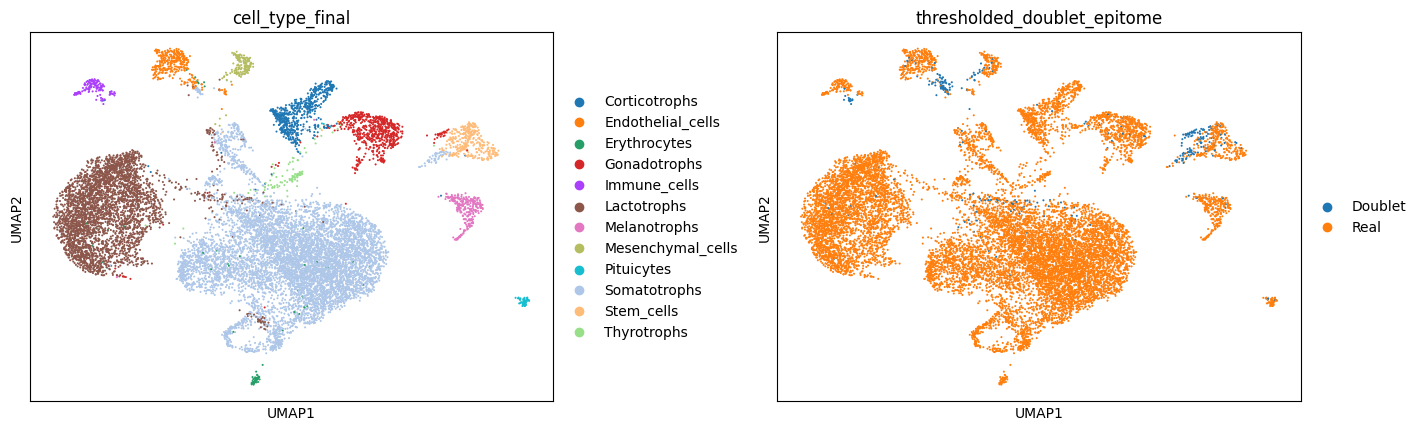

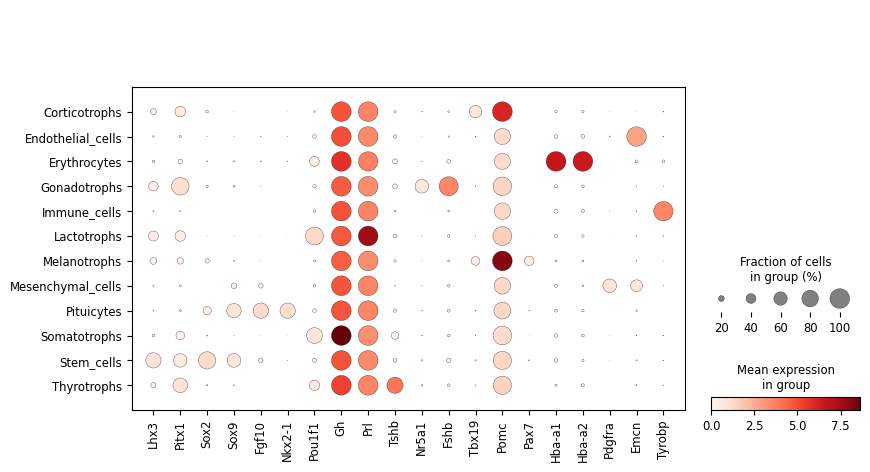

In [9]:
adata = sc.read_10x_mtx(f"/content/GSE120410/")
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)

adata.layers["log1p"] = adata.X.copy()

#scale
sc.pp.scale(adata, max_value=10)

#pca, neighbors, umap
sc.tl.pca(adata, svd_solver='arpack')
sc.pp.neighbors(adata, n_neighbors=25, n_pcs=42)
sc.tl.umap(adata)

adata.X = adata.layers["log1p"].copy()




#cell typing
adata = celltype_doublet_workflow(
                              adata,
                              active_assay="sc",
                              modality="rna",
                              nan_or_zero="zero"
                          )

#thresholded_doublet_epitome True rename to Doublet and False to Real
adata.obs["thresholded_doublet_epitome"] = adata.obs["thresholded_doublet_epitome"].replace({True: "Doublet", False: "Real"})
#plotting
umap = sc.pl.umap(adata, color=['cell_type_final','thresholded_doublet_epitome'],wspace=0.3, return_fig=True)
#save as png and svg
umap.savefig("/content/GSE120410/umap.png", dpi=300)
#dotplot of Sox2, Sox9, Pou1f1, Nr5a1, Tbx19, Pax7
genes = ["Lhx3","Pitx1","Sox2","Sox9","Fgf10","Nkx2-1","Pou1f1","Gh","Prl","Tshb","Nr5a1","Fshb","Tbx19","Pomc","Pax7","Hba-a1","Hba-a2","Pdgfra","Emcn","Tyrobp"]
dotplot = sc.pl.dotplot(adata, genes, groupby="cell_type_final", return_fig=True)
dotplot.savefig("/content/GSE120410/dotplot.png", dpi=300)

### Based on the plots above, we conclude accurate, and useful cell type annotation, performed only in a couple seconds.

### For package/dependency versions, see below

In [10]:
  !pip freeze

absl-py==1.4.0
accelerate==1.12.0
access==1.1.10.post3
affine==2.4.0
aiofiles==24.1.0
aiohappyeyeballs==2.6.1
aiohttp==3.13.3
aiosignal==1.4.0
aiosqlite==0.22.1
alabaster==1.0.0
albucore==0.0.24
albumentations==2.0.8
ale-py==0.11.2
alembic==1.18.3
altair==5.5.0
anndata==0.12.10
annotated-doc==0.0.4
annotated-types==0.7.0
antlr4-python3-runtime==4.9.3
anyio==4.12.1
anywidget==0.9.21
apsw==3.51.2.0
apswutils==0.1.2
argon2-cffi==25.1.0
argon2-cffi-bindings==25.1.0
array-api-compat==1.13.0
array_record==0.8.3
arrow==1.4.0
arviz==0.22.0
astropy==7.2.0
astropy-iers-data==0.2026.2.2.0.48.1
astunparse==1.6.3
atpublic==5.1
attrs==25.4.0
audioread==3.1.0
Authlib==1.6.6
autograd==1.8.0
babel==2.18.0
backcall==0.2.0
beartype==0.22.9
beautifulsoup4==4.13.5
betterproto==2.0.0b6
bigframes==2.33.0
bigquery-magics==0.10.3
bleach==6.3.0
blinker==1.9.0
blis==1.3.3
blobfile==3.1.0
blosc2==4.0.0
bokeh==3.7.3
Bottleneck==1.4.2
bqplot==0.12.45
branca==0.8.2
brotli==1.2.0
CacheControl==0.14.4
cachetools==7.0.